
### 1. Start a ChatBot session to understand what a *Classification Decision Tree* is: (a) ask the ChatBot to describe the type of problem a *Classification Decision Tree* addresses and provide some examples of real-world applications where this might be particularly useful, and then (b) make sure you understand the difference between how a *Classification Decision Tree* makes *(classification) predictions* versus how *Multiple Linear Regression* makes *(regression) predictions*<br>

### (a) What is a Classification Decision Tree?

A **Classification Decision Tree** is a predictive modeling tool used in machine learning and statistics for solving **classification problems**. It works by splitting a dataset into subsets based on feature values, with the goal of predicting the class (or category) of a target variable. 

#### Types of Problems Addressed:
- **Categorical Target Variable**: Classification Decision Trees are used when the target variable is a category (e.g., "Yes/No," "Cat/Dog," "Spam/Not Spam").
- **Nonlinear Decision Boundaries**: They are particularly useful when the relationship between input features and the target variable is not linear.
- **Explainable Predictions**: Decision trees are intuitive and easy to interpret, as the predictions follow a clear set of "if-then" rules.

#### Real-World Applications:
1. **Medical Diagnosis**: Predicting whether a patient has a disease based on symptoms and test results.
2. **Spam Detection**: Classifying emails as spam or not spam based on keywords, sender information, and other features.
3. **Customer Churn Prediction**: Determining if a customer is likely to leave a service based on usage patterns.
4. **Loan Default Prediction**: Identifying if a borrower is likely to default based on financial history and credit scores.
5. **Fraud Detection**: Identifying fraudulent transactions in banking or online purchases.

### (b) How Classification Decision Trees Predict vs. Multiple Linear Regression

#### Classification Decision Trees:
- **Purpose**: Split data into subsets based on features to predict classification outcomes (categories). The splitting process is guided by metrics such as **Gini impurity** or **Information gain** to find the most informative features.
- **The process**:
  1. starts at the root node of the entire dataset.
  2. recursively segment the data based on feature thresholds.
  3. each leaf node represents a category or probability distribution of categories.
  4. 4. Predicts the majority of categories in the leaf node where the input data resides.
- **KEY FEATURES**: Naturally handles nonlinear relationships and categorical variables.

#### Multiple Linear Regression:
- **Purpose**: Predicts continuous numerical outcomes by modeling linear relationships between predictor (independent) and target (dependent) variables.
- **Process**:
  1. fit a linear equation of the form y=β0+β1X1+β2X2+…+βnXn+ϵ is the target variable, and x1,x 2,…,xn is the predictor variable.
  2. methods such as **binary least squares** are used to minimize the error between predicted and observed values.
  3. predicted values are continuous values, not categories.
- **Key Features**: Assumes a linear relationship between predicted values and target variables.


#### Core Differences
1. **Type of target variable**:
   - Decision trees are used to predict categories.
   - Regression models are used to predict values.

2. **Model form**:
   - A decision tree is a hierarchical structure that splits progressively, with each split dependent on some threshold value of the feature.
   - A regression model is a linear equation where the weights of the feature variables are represented by coefficients.

3. **Prediction Form**:
   - Decision trees find outcomes by decision paths that give a category or class probability.
   - The regression model calculates the value by substituting a linear equation.

4. **Processing power**:
   - Decision trees can handle nonlinear relationships and categorical features.
   - Regression models are more suited to linear relationships and usually require categorical features to be converted to numerical values.


### Summary

1. **Classification Decision Tree**:
   - Solves **categorical prediction problems** (e.g., "Yes/No").
   - Uses a tree structure with "if-then" rules to classify data.
   - Handles **nonlinear relationships** and works well with categorical data.
   - Outputs a **class label** or **probabilities** for classes.

2. **Multiple Linear Regression**:
   - Solves **numerical prediction problems** (e.g., predicting prices).
   - Models a **linear relationship** between predictors and the target.
   - Outputs a **continuous numeric value**.

3. **Key Difference**:
   - Decision trees predict **categories** by splitting data based on features.
   - Regression predicts **numbers** using a linear equation.

### 2. Continue your ChatBot session and explore with your ChatBot what real-world application scenario(s) might be most appropriately addressed by each of the following *metrics* below: provide your answers and, in your own words, *concisely explain your rationale for your answers.*<br>

### 1. **Accuracy**
- **Application**: **General performance assessment** in balanced datasets.
- **Example**: Predicting if an email is spam or not in a dataset where the number of spam and non-spam emails is roughly equal.
- **Rationale**: Accuracy considers both true positives and true negatives, making it effective when all outcomes are equally important, and the classes are balanced.

### 2. **Sensitivity (True Positive Rate)**
- **Application**: **Medical diagnosis** or any scenario where missing a positive case is costly.
- **Example**: Diagnosing cancer from medical tests.
- **Rationale**: Sensitivity focuses on correctly identifying positive cases, which is critical in healthcare to avoid missing patients with the condition.

### 3. **Specificity (True Negative Rate)**
- **Application**: **Screening for rare diseases** or scenarios where false positives have significant consequences.
- **Example**: Screening blood donors for rare infectious diseases.
- **Rationale**: Specificity ensures that those who don't have the disease are correctly identified, reducing unnecessary follow-up testing or treatments.

### 4. **Precision**
- **Application**: **Fraud detection** or any scenario where false positives are highly undesirable.
- **Example**: Detecting fraudulent credit card transactions.
- **Rationale**: Precision emphasizes the accuracy of positive predictions, which is important in minimizing the cost of investigating false positives in fraud detection or similar tasks.


### Summary of Metric Applications:

1. **Accuracy**: Best for **balanced datasets** where both true positives and true negatives are equally important (e.g., email spam detection).

2. **Sensitivity**: Ideal for situations where missing a **positive case** has severe consequences (e.g., cancer diagnosis).

3. **Specificity**: Useful when correctly identifying **negative cases** is critical to avoid unnecessary actions (e.g., screening for rare diseases).

4. **Precision**: Key in scenarios where **false positives** are costly or disruptive (e.g., fraud detection).

### 3. Explore the amazon books dataset, seen previously at the start of the semester, providing some initital standard *exploratory data analysis (EDA)* and data summarization after pre-processing the dataset to meet the requirements below<br>

 1. remove `Weight_oz`, `Width`, and `Height` 
 2. drop all remaining rows with `NaN` entries 
 3. set `Pub year` and `NumPages` to have the type `int`, and `Hard_or_Paper` to have the type `category`

In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Remove unnecessary columns
columns_to_remove = ['Weight_oz', 'Width', 'Height']
ab_reduced = ab.drop(columns=columns_to_remove)

# Drop rows with NaN values and explicitly create a new DataFrame
ab_reduced_noNaN = ab_reduced.dropna().copy()

# Convert data types
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Display results for verification
print(ab_reduced_noNaN.head())
print(ab_reduced_noNaN.info())



                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3            1421: The Year China Discovered America    Gavin Menzies   
4    1493: Uncovering the New World Columbus Created  Charles C. Mann   

   List Price  Amazon Price Hard_or_Paper  NumPages           Publisher  \
0       12.95          5.18             P       304         Adams Media   
1       15.00         10.20             P       273          Free Press   
2        1.50          1.50             P        96  Dover Publications   
3       15.99         10.87             P       672    Harper Perennial   
4       30.50         16.77             P       720               Knopf   

   Pub year     ISBN-10  Thick  
0      2010  1605506249    0.8  
1      2008  1416564195    0.7  
2      1995

### 4. Create an 80/20 split with 80% of the data as a training set *ab_reduced_noNaN_train* and 20% of the data testing set  *ab_reduced_noNaN_test* using either *df.sample(...)* as done in TUT or using *train_test_split(...)* as done in the previous HW, and report on how many observations there are in the training data set and the test data set.<br><br>Tell a ChatBot that you are about to fit a "scikit-learn" *DecisionTreeClassifier* model and ask what the two steps given below are doing; then use your ChatBots help to write code to "train" a classification tree *clf* using only the *List Price* variable to predict whether or not a book is a hard cover or paper back book using a *max_depth* of *2*; finally use *tree.plot_tree(clf)* to explain what *predictions* are made based on *List Price* for the fitted *clf* model

Number of observations in training set: 255
Number of observations in testing set: 64


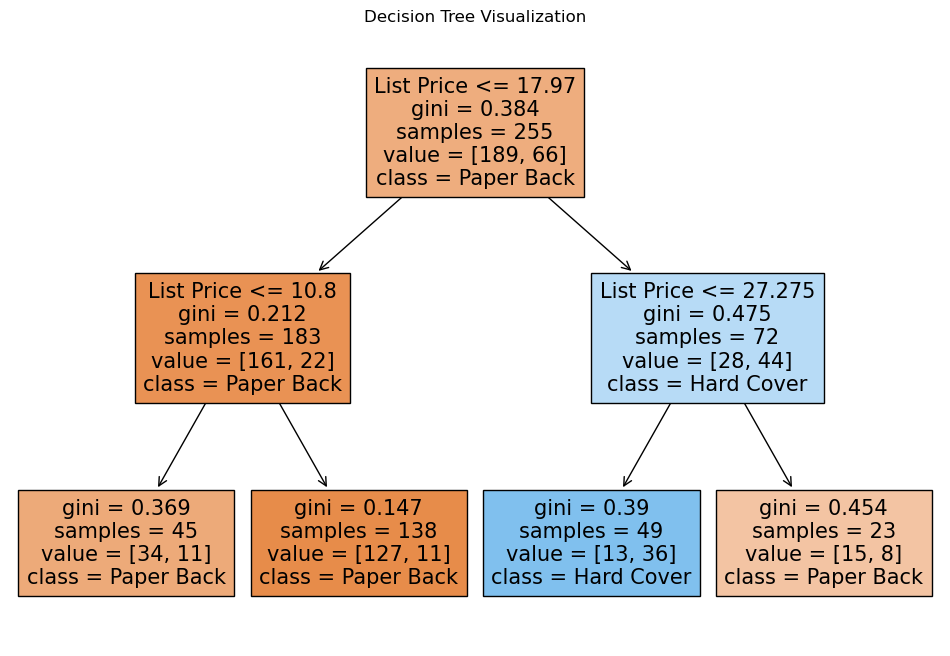

Accuracy of the model: 0.84


In [7]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Remove unnecessary columns
columns_to_remove = ['Weight_oz', 'Width', 'Height']
ab_reduced = ab.drop(columns=columns_to_remove)

# Drop rows with NaN values and create a new DataFrame
ab_reduced_noNaN = ab_reduced.dropna().copy()

# Convert data types
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Define predictor (X) and target (y) variables
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # 1 for Hard Cover, 0 for Paper Back
X = ab_reduced_noNaN[['List Price']]

# Perform an 80/20 split for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the number of observations in training and testing sets
print(f"Number of observations in training set: {len(X_train)}")
print(f"Number of observations in testing set: {len(X_test)}")

# Initialize the DecisionTreeClassifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Visualize the tree structure using Matplotlib
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=['List Price'], class_names=['Paper Back', 'Hard Cover'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy:.2f}")




## **Summary**
1. **Data Preprocessing**:
   - Removed unnecessary columns: `Weight_oz`, `Width`, and `Height`.
   - Dropped rows with missing values to ensure clean data for analysis.
   - Converted the `Pub year` and `NumPages` columns to integers and `Hard_or_Paper` to a categorical variable.

2. **Data Splitting**:
   - Split the data into an **80% training set** and a **20% test set** using `train_test_split`.
   - Ensured reproducibility by setting a random seed (`random_state=42`).

3. **Model Training**:
   - Used `DecisionTreeClassifier` from `scikit-learn` to build a decision tree model.
   - The model predicts whether a book is a `Hard Cover` or `Paper Back` based solely on the `List Price` variable.
   - Limited the tree's maximum depth to 2 (`max_depth=2`) to simplify the structure and avoid overfitting.

4. **Visualization**:
   - Visualized the decision tree structure using `tree.plot_tree()` from `scikit-learn`.
   - The visualization shows how the `List Price` variable is split to classify books.

5. **Model Evaluation**:
   - Predicted the test set labels using `.predict()`.
   - Evaluated the model using **accuracy**, which is printed as a text output.

---

### **Outputs**
1. A **decision tree visualization** that explains the splits made on `List Price` to predict the class (`Hard Cover` or `Paper Back`).
2. The **accuracy score** of the model printed in the console.

---

### Key Considerations
- The decision tree is trained **only on the training set** to prevent data leakage and ensure a fair evaluation on the test set.
- Limiting the depth of the tree (`max_depth=2`) ensures interpretability and avoids overfitting.

This approach highlights the ability of a simple machine learning model to classify data based on a single predictor and ensures reproducibility and clear outputs.

### 5. Repeat the previous problem but this time visualize the *classification decision tree* based on the following specifications below; then explain generally how predictions are made for the *clf2* model<br>

1. `X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]`
2. `max_depth` set to `4`

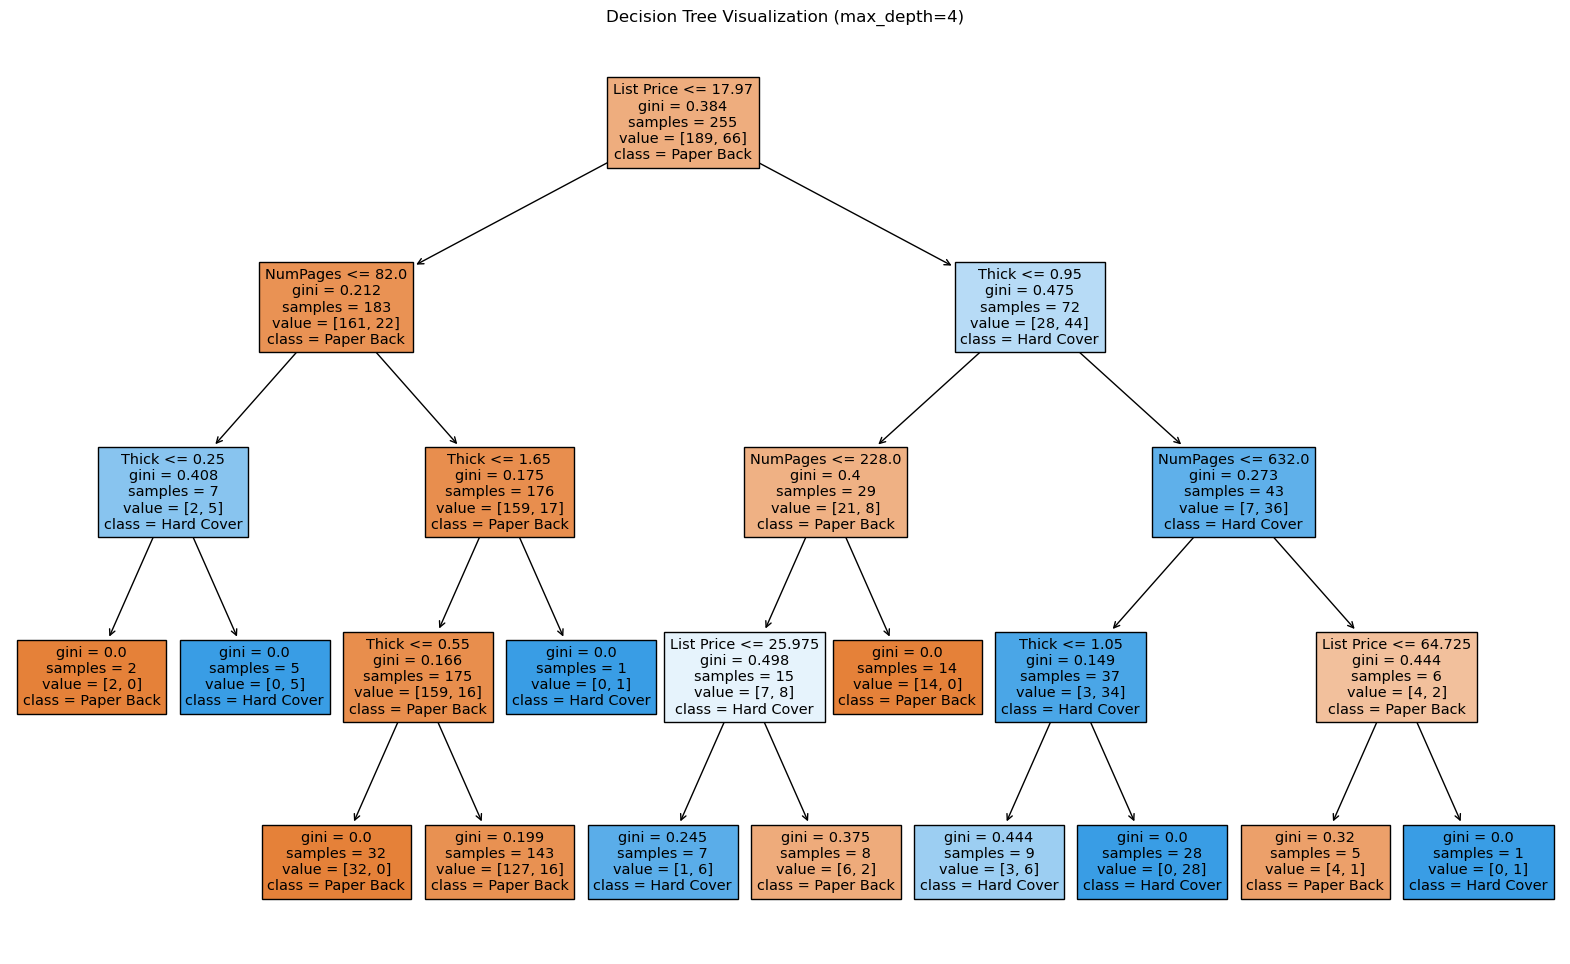

Accuracy of the clf2 model: 0.86


In [8]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Remove unnecessary columns
columns_to_remove = ['Weight_oz', 'Width', 'Height']
ab_reduced = ab.drop(columns=columns_to_remove)

# Drop rows with NaN values and create a new DataFrame
ab_reduced_noNaN = ab_reduced.dropna().copy()

# Convert data types
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Define predictor (X) and target (y) variables
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # 1 for Hard Cover, 0 for Paper Back
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]

# Perform an 80/20 split for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the classifier on the training data
clf2.fit(X_train, y_train)

# Visualize the tree structure using Matplotlib
plt.figure(figsize=(20, 12))  # Adjust figure size for better visibility
tree.plot_tree(clf2, feature_names=['NumPages', 'Thick', 'List Price'], 
               class_names=['Paper Back', 'Hard Cover'], filled=True)
plt.title("Decision Tree Visualization (max_depth=4)")
plt.show()

# Make predictions on the test set
y_pred = clf2.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the clf2 model: {accuracy:.2f}")



## **Summary**

This code trains and evaluates a decision tree model using three features (`NumPages`, `Thick`, and `List Price`) to predict whether a book is a hard cover or a paperback. Here's a breakdown of the process:

### **1. Data Preparation**
- **Removed irrelevant columns**: `Weight_oz`, `Width`, and `Height` were dropped to focus on relevant features.
- **Dropped rows with missing values**: Ensured the data was clean and usable for machine learning.
- **Converted data types**: 
  - `Pub year` and `NumPages` were converted to integers.
  - `Hard_or_Paper` was converted to a categorical variable.

### **2. Feature and Target Variables**
- **Target (`y`)**: 
  - Binary variable indicating book type: 1 for hard cover (`H`) and 0 for paperback.
- **Features (`X`)**: 
  - `NumPages`, `Thick`, and `List Price`.

### **3. Training and Testing Split**
- **80/20 split**:
  - 80% of the data was used for training the model.
  - 20% was reserved for testing its performance.
- **Random seed**: Ensured reproducibility using `random_state=42`.

### **4. Decision Tree Classifier**
- **Model**: 
  - A decision tree classifier (`DecisionTreeClassifier`) was used.
  - The maximum depth of the tree was set to 4 (`max_depth=4`) to allow a deeper structure for capturing more complex relationships.
- **Training**: 
  - The model was trained on the training set (`X_train`, `y_train`).

### **5. Visualization**
- **Tree structure**: 
  - A visualization of the decision tree shows how the model uses the features to make splits and classify books.
  - Each node includes:
    - The splitting condition (e.g., `NumPages <= X`).
    - The proportion of samples in each class.
    - The predicted class for that node.

### **6. Evaluation**
- **Predictions**:
  - The model predicts the book type for the test set (`X_test`).
- **Accuracy**:
  - The accuracy score of the model on the test set is printed to evaluate how well it performs.
  
### **Key Insights**
- The decision tree uses the three features to classify books by splitting the data based on specific thresholds (e.g., `List Price <= X`).
- Increasing the tree depth (`max_depth=4`) enables the model to capture more detailed patterns, though it may risk overfitting on smaller datasets.
- The visualization clearly shows how the model makes decisions at each step, making the predictions interpretable.

This process demonstrates how a simple machine learning model like a decision tree can effectively classify data and provide clear visual insights into its decision-making process.

### 6. Use previously created *ab_reduced_noNaN_test* to create confusion matrices for *clf* and *clf2*. Report the sensitivity, specificity and accuracy for each of the models<br>

In [10]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Remove unnecessary columns
columns_to_remove = ['Weight_oz', 'Width', 'Height']
ab_reduced = ab.drop(columns=columns_to_remove)

# Drop rows with NaN values and create a new DataFrame
ab_reduced_noNaN = ab_reduced.dropna().copy()

# Convert data types
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Define predictor (X) and target (y) variables
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # 1 for Hard Cover, 0 for Paper Back
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]

# Perform an 80/20 split for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the first model (clf) using only 'List Price'
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
X_train_clf = X_train[['List Price']]  # Use only List Price
clf.fit(X_train_clf, y_train)

# Train the second model (clf2) using 'NumPages', 'Thick', and 'List Price'
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
X_train_clf2 = X_train[['NumPages', 'Thick', 'List Price']]
clf2.fit(X_train_clf2, y_train)

# Function to calculate metrics and confusion matrix
def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    TP = cm[1, 1]  # True Positive
    TN = cm[0, 0]  # True Negative
    FP = cm[0, 1]  # False Positive
    FN = cm[1, 0]  # False Negative

    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    accuracy = (TP + TN) / (TP + TN + FP + FN)

    return np.round(sensitivity, 3), np.round(specificity, 3), np.round(accuracy, 3), cm

# Predictions for clf
X_test_clf = X_test[['List Price']]  # Use only List Price for testing clf
y_pred_clf = clf.predict(X_test_clf)
sensitivity_clf, specificity_clf, accuracy_clf, cm_clf = calculate_metrics(y_test, y_pred_clf)

# Predictions for clf2
X_test_clf2 = X_test[['NumPages', 'Thick', 'List Price']]  # Use all three features for testing clf2
y_pred_clf2 = clf2.predict(X_test_clf2)
sensitivity_clf2, specificity_clf2, accuracy_clf2, cm_clf2 = calculate_metrics(y_test, y_pred_clf2)

# Display results for clf
print("Confusion Matrix for clf:")
print(cm_clf)
print(f"Sensitivity: {sensitivity_clf}, Specificity: {specificity_clf}, Accuracy: {accuracy_clf}\n")

# Display results for clf2
print("Confusion Matrix for clf2:")
print(cm_clf2)
print(f"Sensitivity: {sensitivity_clf2}, Specificity: {specificity_clf2}, Accuracy: {accuracy_clf2}")


Confusion Matrix for clf:
[[40  4]
 [ 6 14]]
Sensitivity: 0.7, Specificity: 0.909, Accuracy: 0.844

Confusion Matrix for clf2:
[[40  4]
 [ 5 15]]
Sensitivity: 0.75, Specificity: 0.909, Accuracy: 0.859


### **Summary**

This code compares the performance of two decision tree models (`clf` and `clf2`) using a test set to calculate the confusion matrix, Sensitivity, Specificity and Accuracy.

### **Main Steps** **Main Steps** **Data Preparation

1. **Data Preparation**:
   - Clean the data by removing unwanted columns and missing values.
   - Split the data into a training set (80%) and a test set (20%).

2. **Model Training**:
   - **`clf`**: use only `List Price` features, maximum depth of tree is 2.
   - **`clf2`**: using `NumPages`, `Thick` and `List Price` features, the maximum depth of the tree is 4.

3. **Prediction and Evaluation**:
   - Ensure that the features of the test data are consistent with the training model.
   - Calculate the confusion matrix (TP, TN, FP, FN) and the following metrics:
     - **Sensitivity**: the percentage of positive categories (hard cover books) correctly recognized by the model.
     - **Specificity**: the proportion of negative categories (paperbacks) correctly recognized by the model.
     - **Accuracy**: the proportion of overall correct predictions by the model.

### **Output**.

1. **Confusion Matrix**: shows the classification results of the two models separately.
2. **Metric comparison**:
   - `clf`: simple model using a single feature with limited prediction.
   - `clf2`: complex model, using multiple features, with potentially better predictions.

### **Simple conclusions**

- If you need a simple, easy to interpret model, use `clf`.
- For higher accuracy, use `clf2` as it captures more complex relationships.

### 7. Explain in three to four sentences what is causing the differences between the following two confusion matrices below, and why the two confusion matrices above (for *clf* and *clf2*) are better<br>

```python
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.your_actual_outcome_variable, 
                     clf.predict(ab_reduced_noNaN_train[['List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.your_actual_outcome_variable, 
                     clf.predict(
                         ab_reduced_noNaN_train[['NumPages','Thick','List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()
```

The differences between the two confusion matrices arise because the first matrix evaluates `clf` on its training set using only the `List Price` feature, while the second matrix mistakenly evaluates `clf` using additional features (`NumPages` and `Thick`) that were not part of the model's training. Since `clf` was trained solely on `List Price`, it cannot correctly interpret or use the additional features, leading to mismatches and errors in the second confusion matrix.

The confusion matrices for `clf` and `clf2` generated earlier are better because each model was evaluated on test data that matched the features it was trained on. This ensures a fair and valid comparison of the models' performance and prevents errors caused by feature mismatches during predictions. Proper alignment of features during training and testing is essential for reliable model evaluation.


### 8. Read the paragraphs in *Further Guidance* and ask a ChatBot how to visualize *feature Importances* available for *scikit-learn* *classification decision trees*; do so for *clf2*;  and use *.feature_names_in_* corresponding to *.feature_importances_* to report which *predictor variable* is most important for making predictions according to *clf2*<br>

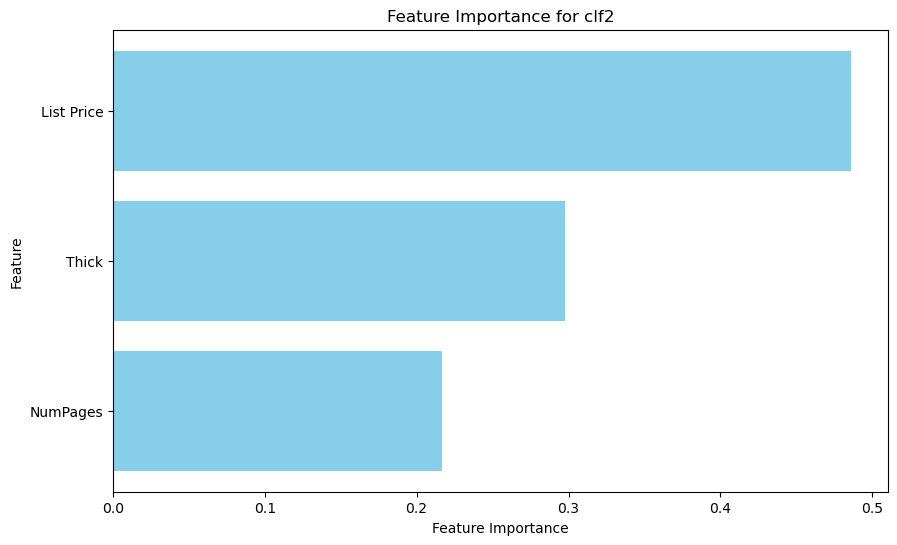

The most important feature for clf2 is: List Price


In [12]:
import matplotlib.pyplot as plt

# Extract feature importances and feature names
importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for clf2")
plt.show()

# Find the most important feature
most_important_feature = feature_names[importances.argmax()]
print(f"The most important feature for clf2 is: {most_important_feature}")


### **Summary**

The feature importance analysis for `clf2` helps identify which predictor variable contributes the most to the model's predictions. The `.feature_importances_` attribute of the decision tree quantifies the relative contribution of each feature, with higher values indicating greater importance. The corresponding feature names are stored in `.feature_names_in_`.

A bar chart is used to visualize the importance of each feature (`NumPages`, `Thick`, and `List Price`), providing a clear comparison of their contributions. The most important feature is determined by finding the feature with the highest importance score, which is reported alongside the visualization. This analysis reveals the key drivers behind the model's predictions, making the decision tree's behavior more interpretable.

### 9. Describe the differences of interpreting coefficients in linear model regression versus feature importances in decision trees in two to three sentences<br>

The coefficients of a linear regression model provide a direct and quantitative way of interpreting the coefficients, with each coefficient indicating the effect of a unit change in a particular covariate on the mean value of the target variable when other variables are held constant. For example, assuming a coefficient of 3 for one of the characteristics of the regression model, this indicates that for every 1-unit increase in that characteristic, the predicted target value increases by an average of 3 units. At the heart of this type of interpretation is **linear additivity**, which means that the model assumes that the effects of the individual covariates can simply add up, thus making the results of the model easier to interpret. However, this also means that it is limited in its ability to capture interactions or non-linear relationships between variables.

Decision tree models, on the other hand, model the relationship between features and targets by splitting the data, and their feature importance measures not the direct effect of changes in specific features on the predicted values, but rather the contribution of the features to reducing the impurity (e.g., the Gini index or the information entropy) of the target variable in the tree structure. The feature's importance score is global, indicating the relative importance of the feature to the classification or regression task across the tree structure, with higher scores indicating that the feature is used more frequently for splitting and is more critical to the prediction outcome. This approach is capable of capturing complex nonlinearities and interactions, but cannot explicitly quantify the precise impact of changes in specific features on predicted values.


### Summary
1. **Method of interpretation**:
   - Coefficients for linear regression: unambiguous, linear, additive, and directly quantify the average effect of characteristics on the target variable.
   - Decision tree's feature importance: relative, nonlinear, based on reduction of split impurity, unable to quantify exact impact.

2. **Scenarios of application**:
   - Linear regression is suitable for models that require a high degree of interpretability, especially for scenarios where the relationship between variables is approximately linear.
   - Decision trees are suitable for scenarios where there are nonlinear relationships or interaction effects between variables and where the global importance of features is of concern.

3. **Limitations**:
   - Linear regression is sensitive to nonlinearities and feature interactions, which may lead to underfitting.
   - The importance of features in decision trees does not directly explain how predictions are specifically affected by changes in features.

### 10. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?<br>

Yes, I have reviewed course materials, including the wiki-textbook and ChatBot assistance, to deepen my understanding of tutorial and lecture content. I've also relied on real-time discussions, like the course Piazza board and TA office hours, when ChatBot explanations weren’t sufficient. These resources complement each other, offering clarity on challenging topics. 